In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 


In [3]:
df = pd.read_csv('height-weight.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

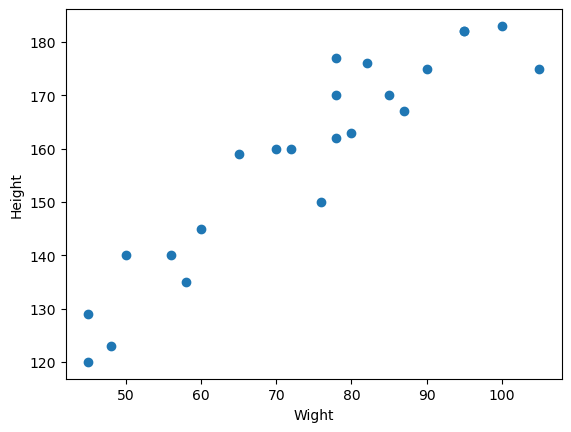

In [5]:
## scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Wight')
plt.ylabel('Height')

In [6]:
## Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


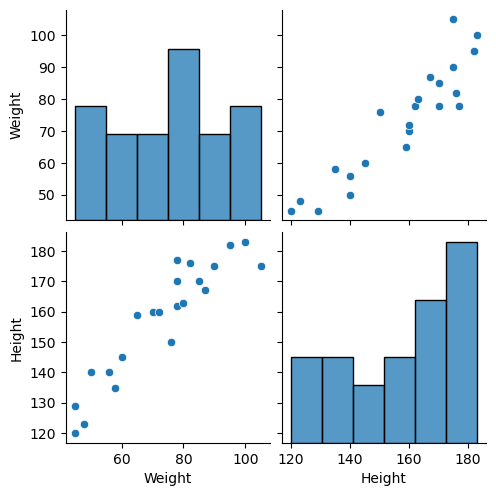

In [7]:
## Seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [8]:
## Independent and Dependent Features
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [9]:
X=df[['Weight']]  ## Independent vairbales we must keep it in dataframe format (two dim) 
y=df['Height']    ## Dependent variable we can keep it in series (one dim)

In [10]:
print(X.shape,y.shape)

(23, 1) (23,)


### Train Test Split
* we need to split the data into two sets to apply our model, one is train and another one is train_test_split
* so when we do that on both X and y, we can train and test our model performance

In [11]:
### Train test split
from sklearn.model_selection import train_test_split
X_train, x_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)

In [12]:
X_train.shape

(17, 1)

In [13]:
x_test.shape

(6, 1)

In [14]:
y_train.shape

(17,)

In [15]:
y_test.shape

(6,)

### Standardization
* Standardization is required to perform to convert the data into single scale, To compare two fields we need them to be in same scale.
* Where weight is in Kgs and heigt is in feets, so to bring both into single scale we use standardization.

In [16]:
### Standardization

from sklearn.preprocessing import StandardScaler

In [17]:
scalar = StandardScaler()   

 * Here the data gets transformed based on Z_Score where mean = 0 and std_dev = 1

In [18]:
X_train = scalar.fit_transform(X_train)  

* In test data we use transform, not fit_transform. Because we want to use the same tranformation of training data. To avoid data leakage

In [19]:
X_test = scalar.transform(x_test)

### Apply Linear Regression Model


In [20]:
# Calling the model
from sklearn.linear_model import LinearRegression

In [21]:
# assigning the model to a variable
regression = LinearRegression()

In [22]:
# applying the model to our x_train and y_train
regression.fit(X_train,y_train)

LinearRegression()

In [23]:
# looking for the coefficient (the slope of the line)
regression.coef_

array([17.2982057])

In [24]:
# looking for the intercept
regression.intercept_

156.47058823529412

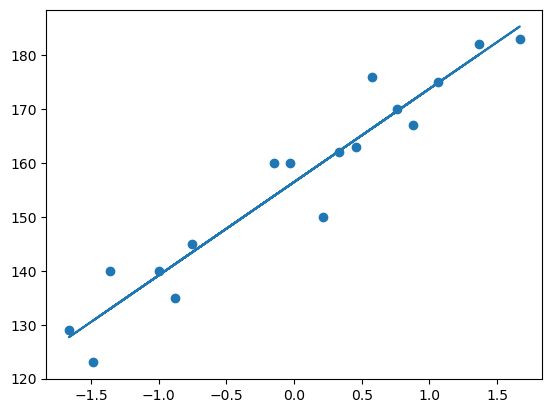

In [26]:
## plot training data best fit line

plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

### Prediction for test data
1. predicted height output = incercept + coef (Weights)
2. y_pred_test = 156.470 + 17.29(X_test)

In [30]:

y_pred = regression.predict(X_test)

### Performance Metrics


In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [31]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.665125886795005
10.716374991212605


### R square
Formula

#### R^2 = 1-SSR/SST
R^2 = Coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [32]:
from sklearn.metrics import r2_score


In [33]:
score = r2_score(y_test,y_pred)
print(score)

0.7360826717981276


* the mentioned R^2 tells the how good our model performed
* MSE/MAE/RMSE tells how much avg error/mistakes our model done.

### Adjusted R^2 = [(1-R^2)*(n-1)/(n-k-1)]
where:
R^2: The R^2 of the model n: The no of observations, k: The no of predictor variables

In [36]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

### OLS Linear Regression

In [37]:
import statsmodels.api as sm

In [38]:
model = sm.OLS(y_train,X_train).fit()

In [39]:
prediction = model.predict(X_test)

In [40]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Tue, 03 Dec 2024   Prob (F-statistic):                       0.664
Time:                        22:52:53   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\RAMMAN INFOTECH\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [42]:
#### Prediction for new data
regression.predict([[72]])

array([1401.94139895])

In [45]:
regression.predict(scalar.transform([[72]]))

c:\Users\RAMMAN INFOTECH\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])